In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Print the current working directory
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is C:\Users\Pranay\Projects\GitHub\Capstone_II


In [3]:
#List files in current working directory
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'bank-additional',
 'Capstone II Problem Statement [PRANAY].pptx',
 'Capstone Two - Project Proposal.docx',
 'Capstone Two Project Ideas and Proposal.docx',
 'data',
 'figures',
 'models',
 'Notebook_Stepfour.ipynb',
 'Notebook_Stepthree.ipynb',
 'Notebook_Steptwo.ipynb',
 'README.md',
 'Untitled.ipynb']

In [4]:
#Create a subfolder in Project Directory
if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('figures'):
    os.makedirs('figures')
if not os.path.exists('models'):
    os.makedirs('models')

In [5]:
#Get Current working directory after creating above subfolders
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'bank-additional',
 'Capstone II Problem Statement [PRANAY].pptx',
 'Capstone Two - Project Proposal.docx',
 'Capstone Two Project Ideas and Proposal.docx',
 'data',
 'figures',
 'models',
 'Notebook_Stepfour.ipynb',
 'Notebook_Stepthree.ipynb',
 'Notebook_Steptwo.ipynb',
 'README.md',
 'Untitled.ipynb']

In [6]:
#Load the data from CSV
df=pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';',header=None,low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [7]:
#Set First Row as columns 
df.columns=df.iloc[0]
df.drop(df.index[0],inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [8]:
#Get the size of data
df.shape

(41188, 21)

<B>Data Types</B>

In [9]:
#Get datatypes
df.dtypes

0
age               object
job               object
marital           object
education         object
default           object
housing           object
loan              object
contact           object
month             object
day_of_week       object
duration          object
campaign          object
pdays             object
previous          object
poutcome          object
emp.var.rate      object
cons.price.idx    object
cons.conf.idx     object
euribor3m         object
nr.employed       object
y                 object
dtype: object

In [10]:
#Change to relevant datatype
cols=['age','duration','campaign','pdays','previous']
cols1=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df[cols] = df[cols].astype(int) 
df[cols1] = df[cols1].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 1 to 41188
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int32  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int32  
 11  campaign        41188 non-null  int32  
 12  pdays           41188 non-null  int32  
 13  previous        41188 non-null  int32  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
#count of unique values for every column, regardless of data type.
pd.Series({col: len(pd.unique(df[col])) for col in df})

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [12]:
#percent of unique values per column
pd.Series({col: df[col].nunique()/len(df[col])*100 for col in df})

age               0.189376
job               0.029135
marital           0.009712
education         0.019423
default           0.007284
housing           0.007284
loan              0.007284
contact           0.004856
month             0.024279
day_of_week       0.012139
duration          3.748665
campaign          0.101971
pdays             0.065553
previous          0.019423
poutcome          0.007284
emp.var.rate      0.024279
cons.price.idx    0.063125
cons.conf.idx     0.063125
euribor3m         0.767214
nr.employed       0.026707
y                 0.004856
dtype: float64

In [13]:
#Range of values using the aggregate function
df.agg(['min','max']).T

,min,max
age,17,98
job,admin.,unknown
marital,divorced,unknown
education,basic.4y,unknown
default,no,yes
housing,no,yes
loan,no,yes
contact,cellular,telephone
month,apr,sep
day_of_week,fri,wed


In [14]:
#Review the numeric dataset's summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


In [15]:
dfyes=df[df['y']=='yes']
dfyes.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
76,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
84,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
89,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
130,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
140,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


hist = df.hist(bins=25,figsize =(20,20))

mari=list(df.marital.value_counts().index)
jobli=list(df.job.value_counts().index)
educa=list(df.education.value_counts().index)
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]

f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(20, 20))
x_1 = pd.DataFrame(df.marital.value_counts()).reindex(mari, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.marital)
x_2 = pd.DataFrame(dfyes.marital.value_counts()).reindex(mari, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.marital)
ax1.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax1.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Marital', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

x_1 = pd.DataFrame(df.job.value_counts()).reindex(jobli, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.job)
x_2 = pd.DataFrame(dfyes.job.value_counts()).reindex(jobli, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.job)
ax2.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax2.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax2)
splot.set(xlabel= 'Job', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.education.value_counts()).reindex(educa, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.education)
x_2 = pd.DataFrame(dfyes.education.value_counts()).reindex(educa, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.education)
ax3.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax3.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax3)
splot.set(xlabel= 'Education', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.month.value_counts()).reindex(months, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.month)
x_2 = pd.DataFrame(dfyes.month.value_counts()).reindex(months, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.month)
ax4.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax4.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax4)
splot.set(xlabel= 'Month', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
                        

In [16]:
#default occurs when a borrower is unable to make timely payments, misses payments, or avoids
#or stops making payments entirely on interest or principal owed
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [17]:
#Since one has no housing loan or no personal loan, ther will be no defauls
df.loc[((df['loan'] == 'no') & (df['housing']=='no')& (df['default']=='unknown')),'default'] = 'no'
df.loc[(((df['loan'] == 'yes')|(df['housing']=='yes')) & (df['default']=='unknown')),'default'] = 'yes'
df['default'].value_counts()

no         36045
yes         4916
unknown      227
Name: default, dtype: int64

In [18]:
df.loc[((df['default']== 'no') & (df['loan']=='unknown')),'loan']='no'
df.loc[((df['housing'] == 'unknown') & (df['default']=='no')),'housing']='no'
df['loan'].value_counts()

no         34713
yes         6248
unknown      227
Name: loan, dtype: int64

In [19]:
df['housing'].value_counts()

yes        21576
no         19385
unknown      227
Name: housing, dtype: int64

In [20]:
indexNames=df.loc[((df['housing'] == 'unknown') & (df['loan']=='unknown'))].index
df.drop(indexNames , inplace=True)
df.shape

(40961, 21)

In [21]:
df["loan"].replace({"yes": 1, "no": 0}, inplace=True)
df["housing"].replace({"yes": 1, "no": 0}, inplace=True)
df["default"].replace({"yes": 1, "no": 0}, inplace=True)

<B>Handle missing values from Education Column</B>

In [22]:
#Counts value from Education columns
df['education'].value_counts()

university.degree      12129
high.school             9481
basic.9y                6007
professional.course     5223
basic.4y                4122
basic.6y                2268
unknown                 1713
illiterate                18
Name: education, dtype: int64

In [23]:
#Check counts for qualification of admin jobs 
df[(df['job'] =='admin.')]['education'].value_counts() 

university.degree      5740
high.school            3318
basic.9y                499
professional.course     363
unknown                 247
basic.6y                151
basic.4y                 75
illiterate                1
Name: education, dtype: int64

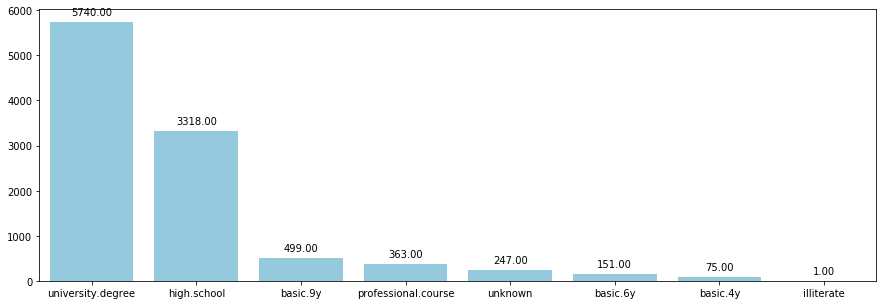

In [24]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='admin.']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [25]:
df.loc[((df['job'] == 'admin.') & (df['education']=='unknown')),'education'] = 'university.degree'
df[(df['job'] =='admin.')]['education'].value_counts() 

university.degree      5987
high.school            3318
basic.9y                499
professional.course     363
basic.6y                151
basic.4y                 75
illiterate                1
Name: education, dtype: int64

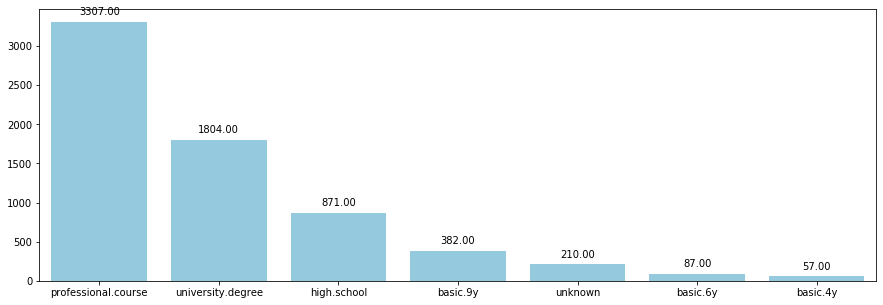

In [26]:
f, ax = plt.subplots(figsize=(15,5))
x_1 = pd.DataFrame(df[df['job']=='technician']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [27]:
df.loc[((df['job'] == 'technician') & (df['education']=='unknown')),'education'] = 'professional.course'
df[(df['job'] =='technician')]['education'].value_counts() 

professional.course    3517
university.degree      1804
high.school             871
basic.9y                382
basic.6y                 87
basic.4y                 57
Name: education, dtype: int64

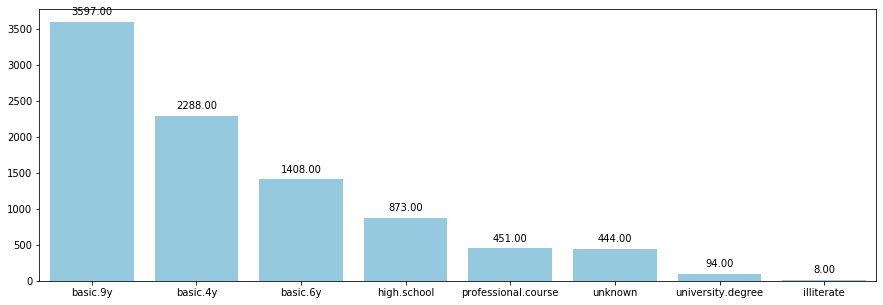

In [28]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='blue-collar']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [29]:
df.loc[((df['job'] == 'blue-collar') & (df['education']=='unknown')),'education'] = 'basic.9y'
df[(df['job'] =='blue-collar')]['education'].value_counts() 

basic.9y               4041
basic.4y               2288
basic.6y               1408
high.school             873
professional.course     451
university.degree        94
illiterate                8
Name: education, dtype: int64

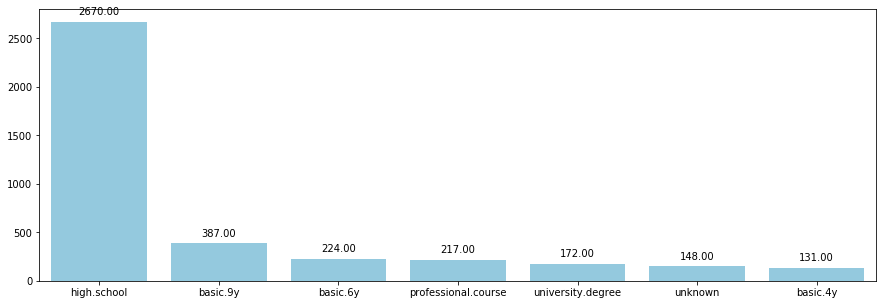

In [30]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='services']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [31]:
df.loc[((df['job'] == 'services') & (df['education']=='unknown')),'education'] = 'high.school'
df[(df['job'] =='services')]['education'].value_counts() 

high.school            2818
basic.9y                387
basic.6y                224
professional.course     217
university.degree       172
basic.4y                131
Name: education, dtype: int64

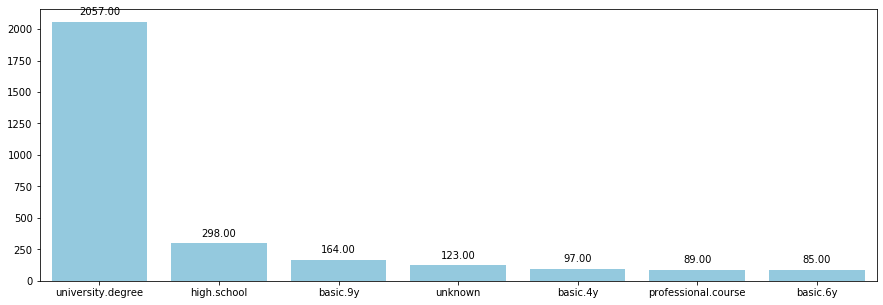

In [32]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='management']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [33]:
df.loc[((df['job'] == 'management') & (df['education']=='unknown')),'education'] = 'university.degree'
df[(df['job'] =='management')]['education'].value_counts() 

university.degree      2180
high.school             298
basic.9y                164
basic.4y                 97
professional.course      89
basic.6y                 85
Name: education, dtype: int64

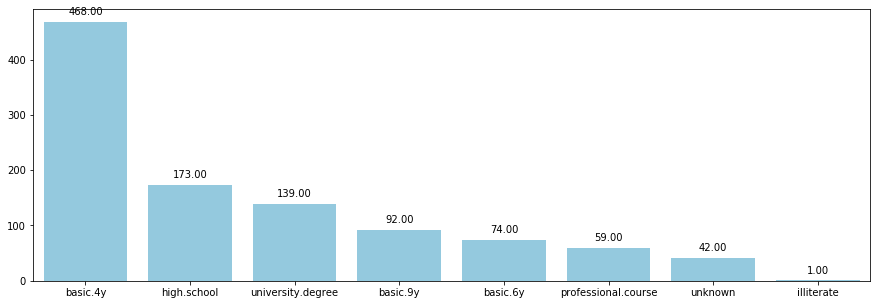

In [34]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='housemaid']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [35]:
df.loc[((df['job'] == 'housemaid') & (df['education']=='unknown')),'education'] = 'basic.4y'
df[(df['job'] =='housemaid')]['education'].value_counts() 

basic.4y               510
high.school            173
university.degree      139
basic.9y                92
basic.6y                74
professional.course     59
illiterate               1
Name: education, dtype: int64

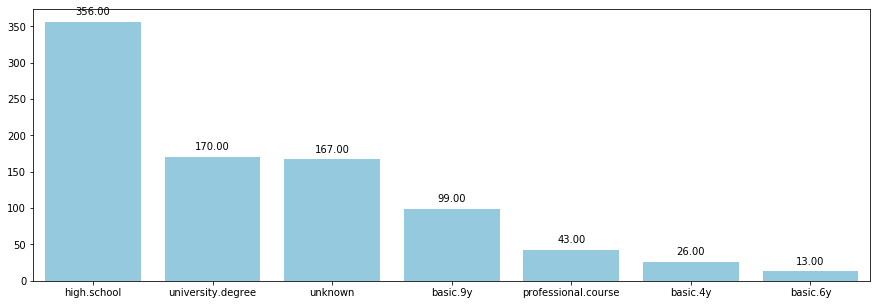

In [36]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['job']=='student']['education'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.education)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [37]:
df.loc[((df['job'] == 'student') & (df['education']=='unknown')),'education'] = 'high.school'
df[(df['job'] =='student')]['education'].value_counts() 

high.school            523
university.degree      170
basic.9y                99
professional.course     43
basic.4y                26
basic.6y                13
Name: education, dtype: int64

In [38]:
df['education'].value_counts()

university.degree      12499
high.school             9796
basic.9y                6451
professional.course     5433
basic.4y                4164
basic.6y                2268
unknown                  332
illiterate                18
Name: education, dtype: int64

<B>Handle missing values from Job column

In [39]:
#Counts value from Education columns
df['job'].value_counts()

admin.           10394
blue-collar       9163
technician        6718
services          3949
management        2913
retired           1711
entrepreneur      1449
self-employed     1410
housemaid         1048
unemployed        1006
student            874
unknown            326
Name: job, dtype: int64

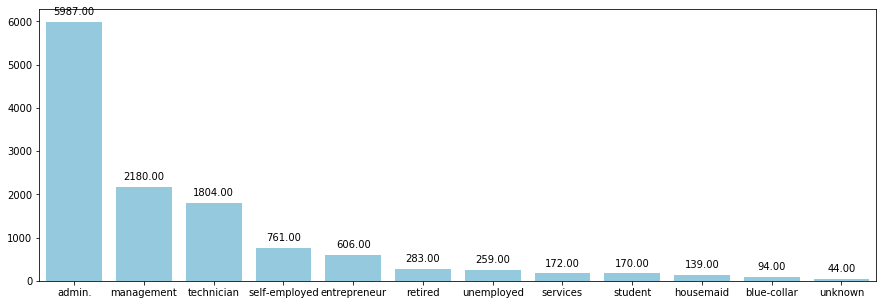

In [40]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='university.degree']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [41]:
df.loc[((df['education'] == 'university.degree') & (df['job']=='unknown')),'job'] = 'admin.'
df[df['education']=='university.degree']['job'].value_counts()

admin.           6031
management       2180
technician       1804
self-employed     761
entrepreneur      606
retired           283
unemployed        259
services          172
student           170
housemaid         139
blue-collar        94
Name: job, dtype: int64

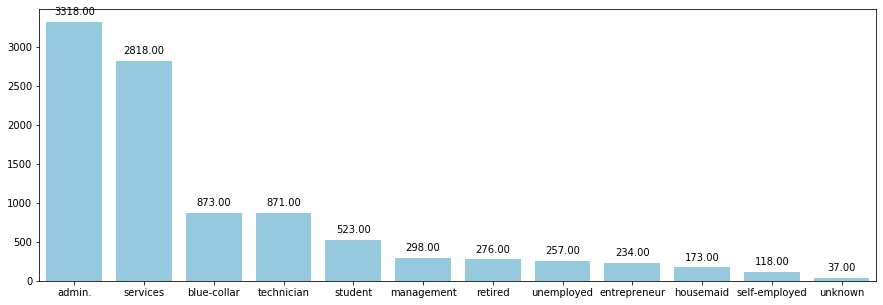

In [42]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='high.school']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [43]:
df.loc[((df['education'] == 'high.school') & (df['job']=='unknown')),'job'] = 'admin.'
df[df['education']=='high.school']['job'].value_counts()

admin.           3355
services         2818
blue-collar       873
technician        871
student           523
management        298
retired           276
unemployed        257
entrepreneur      234
housemaid         173
self-employed     118
Name: job, dtype: int64

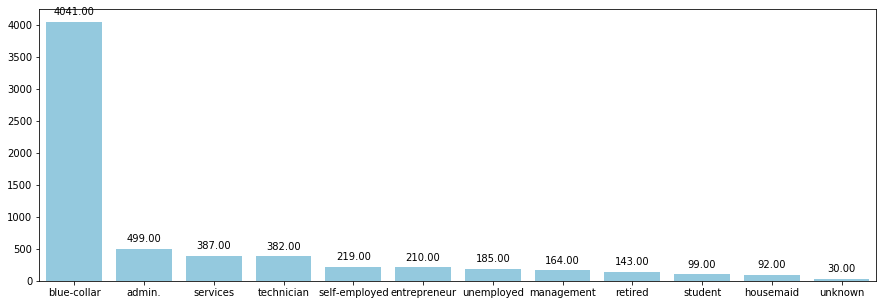

In [44]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='basic.9y']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [45]:
df.loc[((df['education'] == 'basic.9y') & (df['job']=='unknown')),'job'] = 'blue-collar'
df[df['education']=='basic.9y']['job'].value_counts()

blue-collar      4071
admin.            499
services          387
technician        382
self-employed     219
entrepreneur      210
unemployed        185
management        164
retired           143
student            99
housemaid          92
Name: job, dtype: int64

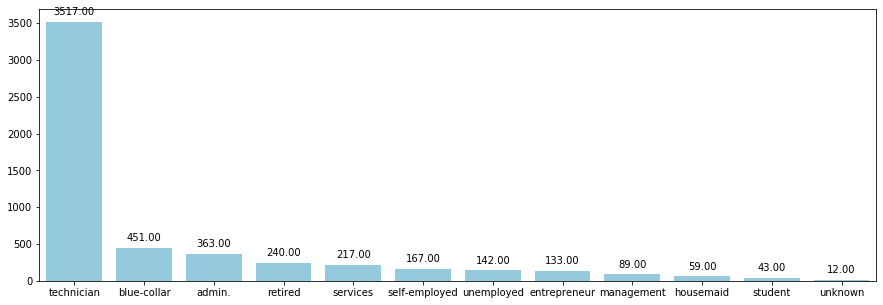

In [46]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='professional.course']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [47]:
df.loc[((df['education'] == 'professional.course') & (df['job']=='unknown')),'job'] = 'technician'
df[df['education']=='professional.course']['job'].value_counts()

technician       3529
blue-collar       451
admin.            363
retired           240
services          217
self-employed     167
unemployed        142
entrepreneur      133
management         89
housemaid          59
student            43
Name: job, dtype: int64

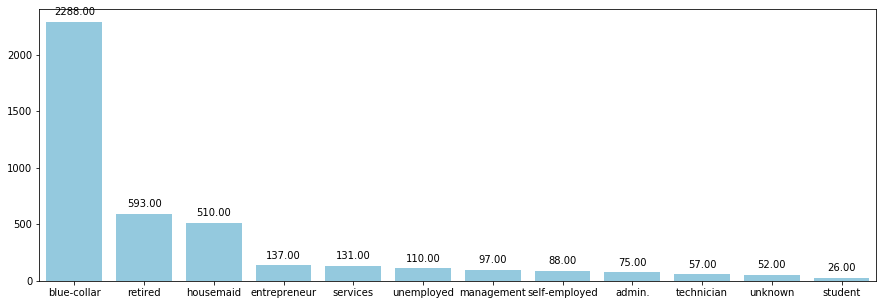

In [48]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='basic.4y']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [49]:
df.loc[((df['education'] == 'basic.4y') & (df['job']=='unknown')),'job'] = 'blue-collar'
df[df['education']=='basic.4y']['job'].value_counts()

blue-collar      2340
retired           593
housemaid         510
entrepreneur      137
services          131
unemployed        110
management         97
self-employed      88
admin.             75
technician         57
student            26
Name: job, dtype: int64

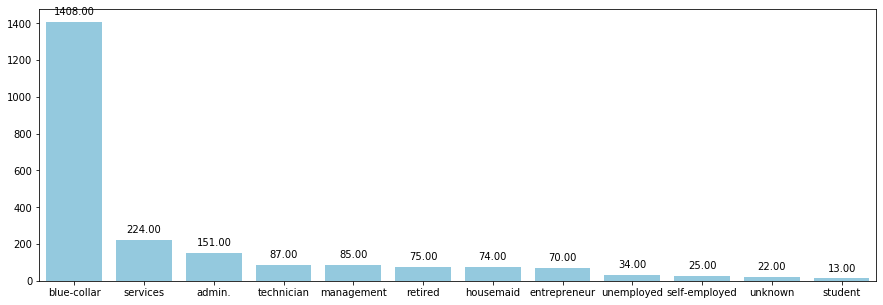

In [50]:
f, ax = plt.subplots(figsize=(15, 5))
x_1 = pd.DataFrame(df[df['education']=='basic.6y']['job'].value_counts())
names_1 = list(x_1.index)
values_1 = list(x_1.job)
splot=sns.barplot(x=names_1, y=values_1, color = 'skyblue',palette=None)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

In [51]:
df.loc[((df['education'] == 'basic.6y') & (df['job']=='unknown')),'job'] = 'blue-collar'
df[df['education']=='basic.6y']['job'].value_counts()

blue-collar      1430
services          224
admin.            151
technician         87
management         85
retired            75
housemaid          74
entrepreneur       70
unemployed         34
self-employed      25
student            13
Name: job, dtype: int64

In [52]:
df['job'].value_counts()

admin.           10475
blue-collar       9267
technician        6730
services          3949
management        2913
retired           1711
entrepreneur      1449
self-employed     1410
housemaid         1048
unemployed        1006
student            874
unknown            129
Name: job, dtype: int64

In [53]:
#Drop the Rows where  which Job or Education Fields are unknown
indexNames = df[(df.job == 'unknown') | (df.education == 'unknown') ].index
df.drop(indexNames , inplace=True)
df.shape

(40629, 21)

In [54]:
#The duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
#Thus, this input should only be included for benchmark purposes and 
#should be discarded if the intention is to have a realistic predictive model.
df.drop('duration', axis=1,inplace=True)
df.shape

(40629, 20)

In [55]:
#Check different Number of contact performed for clients previously for those clients which were not previously contacted  
#df[(df['pdays']==999) & (df['previous'] != 0)][['pdays','previous']]
df[(df['pdays']==999)]['previous'].value_counts()

0    35068
1     3656
2      345
3       50
4       11
5        2
6        1
Name: previous, dtype: int64

In [56]:
#For clients which were not contacted previously(pdays=999) for them number of contacts should be 0
df.loc[((df['pdays'] == 999) & (df['previous']!= 0)),'previous'] = 0
df[(df['pdays']==999)]['previous'].value_counts()

0    39133
Name: previous, dtype: int64

In [57]:
indexNames = df[(df.marital == 'unknown')].index
df.drop(indexNames , inplace=True)
df.shape

(40554, 20)

In [58]:
if 'unknown' in df.values : 
    print("\nThis value exists in Dataframe") 
  
else : 
    print("\nThis value does not exists in Dataframe") 


This value does not exists in Dataframe


## Export data to a new csv file 

In [59]:
df.to_csv('data/step2_output.csv',index=False)